In [570]:
#Imports

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np


In [571]:
df = pd.read_csv('BankChurners.csv')
colunasRemover = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

# Dropar as colunas
df = df.dropna()
df = df.drop(colunasRemover, axis=1)
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [572]:
selected_columns = ['Customer_Age', 'Gender', 'Credit_Limit', 'Avg_Open_To_Buy']
filtered_data = df[selected_columns]
df = pd.get_dummies(filtered_data, columns=['Gender'])
df.head()

,Customer_Age,Credit_Limit,Avg_Open_To_Buy,Gender_F,Gender_M
0,45,12691.0,11914.0,False,True
1,49,8256.0,7392.0,True,False
2,51,3418.0,3418.0,False,True
3,40,3313.0,796.0,True,False
4,40,4716.0,4716.0,False,True


In [573]:
df.isnull().sum()

Customer_Age       0
Credit_Limit       0
Avg_Open_To_Buy    0
Gender_F           0
Gender_M           0
dtype: int64

In [574]:
df.isna().sum()

Customer_Age       0
Credit_Limit       0
Avg_Open_To_Buy    0
Gender_F           0
Gender_M           0
dtype: int64

In [575]:
from scipy.stats import zscore
# Funçao para remover outliers
def remove_outliers_zscore(data, column, threshold=1):
    # Calcula os escores Z
    z_scores = zscore(data[column])
    
    # Identifica os outliers
    outliers_mask = abs(z_scores) > threshold
    
    # Remove os outliers
    data_sem_outliers = data[~outliers_mask]
    
    return data_sem_outliers

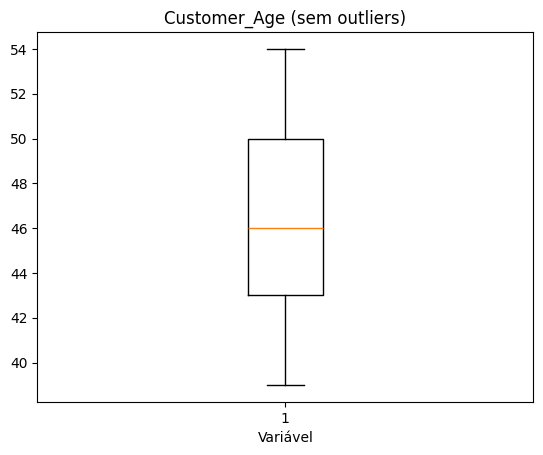

In [576]:
df_clean = remove_outliers_zscore(df, 'Customer_Age')

plt.boxplot(df_clean['Customer_Age'])
plt.title('Customer_Age (sem outliers)')
plt.xlabel('Variável')
plt.show()


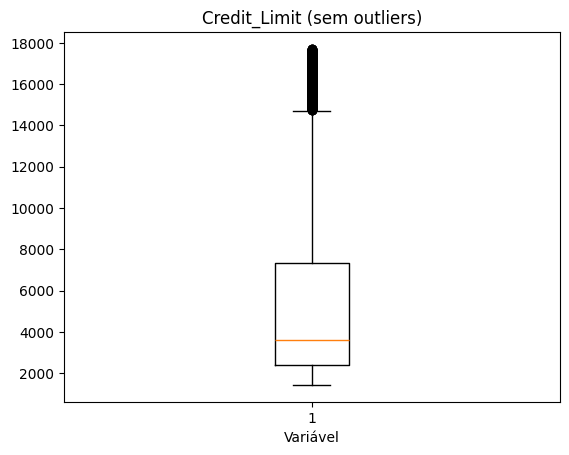

In [577]:
df_clean = remove_outliers_zscore(df, 'Credit_Limit')

# Boxplot após a remoção dos outliers
plt.boxplot(df_clean['Credit_Limit'])
plt.title('Credit_Limit (sem outliers)')
plt.xlabel('Variável')
plt.show()


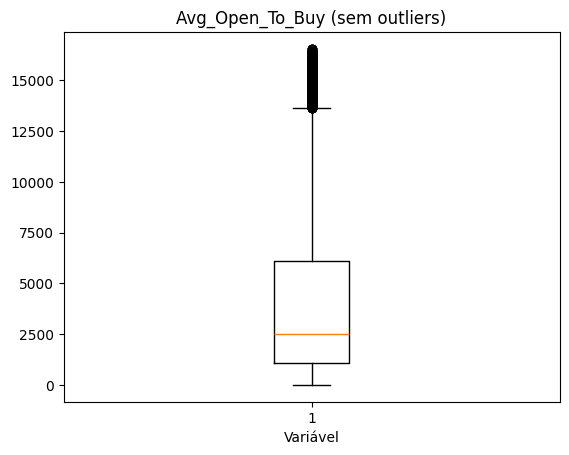

In [578]:
df_clean = remove_outliers_zscore(df, 'Avg_Open_To_Buy')

# Boxplot após a remoção dos outliers
plt.boxplot(df_clean['Avg_Open_To_Buy'])
plt.title('Avg_Open_To_Buy (sem outliers)')
plt.xlabel('Variável')
plt.show()


In [579]:
df = df_clean
df_sem_normalizacao = df.copy()

# Normalizando as colunas selecionadas
scaler = StandardScaler()
df[['Customer_Age', 'Avg_Open_To_Buy', 'Credit_Limit']] = scaler.fit_transform(df[['Customer_Age', 'Avg_Open_To_Buy', 'Credit_Limit']])

# Visualizando as primeiras linhas dos dados codificados e normalizados
print("Dados Normalizados:")
print(df.head())

print("\nDados Não Normalizados:")
print(df_sem_normalizacao.head())


Dados Normalizados:
   Customer_Age  Credit_Limit  Avg_Open_To_Buy  Gender_F  Gender_M
0     -0.160782      1.828647         1.919769     False      True
1      0.327115      0.726599         0.799028      True     False
2      0.571064     -0.475590        -0.185896     False      True
3     -0.770654     -0.501681        -0.835737      True     False
4     -0.770654     -0.153051         0.135803     False      True

Dados Não Normalizados:
   Customer_Age  Credit_Limit  Avg_Open_To_Buy  Gender_F  Gender_M
0            45       12691.0          11914.0     False      True
1            49        8256.0           7392.0      True     False
2            51        3418.0           3418.0     False      True
3            40        3313.0            796.0      True     False
4            40        4716.0           4716.0     False      True


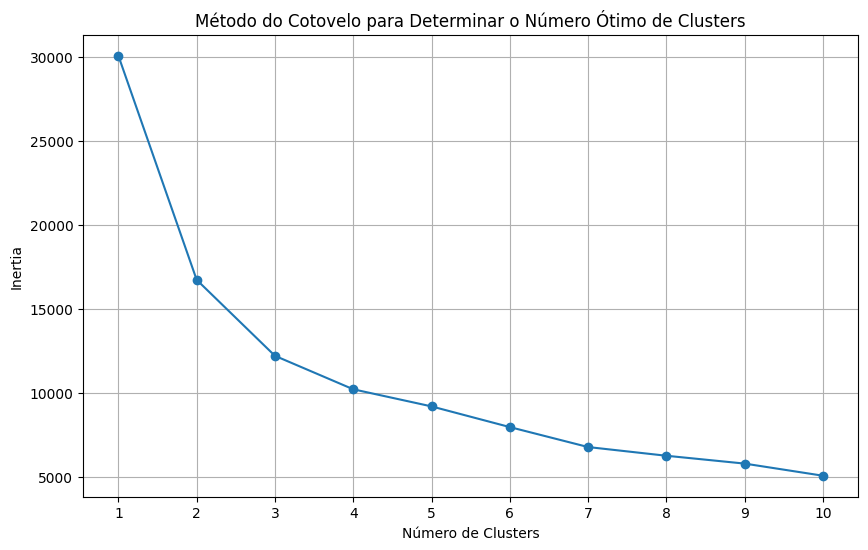

In [580]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Plotando o método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo para Determinar o Número Ótimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [581]:
from sklearn.cluster import KMeans

# Selecionando as variáveis para o K-Means
X = df[['Customer_Age', 'Credit_Limit']]

# Definindo o número de clusters
num_clusters = 5

# Criando o modelo K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Treinando o modelo
kmeans.fit(X)

# Adicionando as previsões de cluster ao DataFrame original
df['Cluster'] = kmeans.labels_

# Visualizando as primeiras linhas dos dados com os clusters
print("Dados com Clusters:")
print(df.head())


Dados com Clusters:
   Customer_Age  Credit_Limit  Avg_Open_To_Buy  Gender_F  Gender_M  Cluster
0     -0.160782      1.828647         1.919769     False      True        4
1      0.327115      0.726599         0.799028      True     False        3
2      0.571064     -0.475590        -0.185896     False      True        2
3     -0.770654     -0.501681        -0.835737      True     False        1
4     -0.770654     -0.153051         0.135803     False      True        1


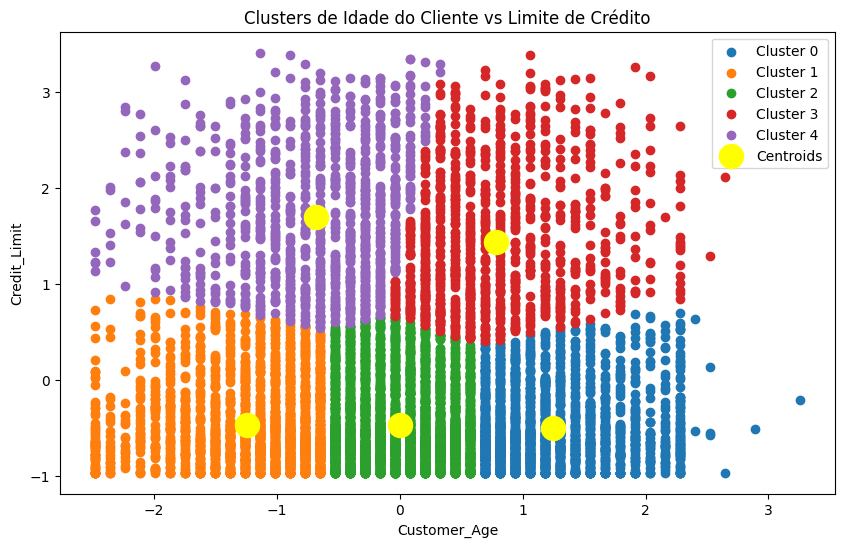

In [582]:
import matplotlib.pyplot as plt

# Scatterplot dos clusters
plt.figure(figsize=(10, 6))

# Scatter dos pontos pertencentes a cada cluster
for cluster in range(num_clusters):
    plt.scatter(df[df['Cluster'] == cluster]['Customer_Age'], 
                df[df['Cluster'] == cluster]['Credit_Limit'], 
                label=f'Cluster {cluster}')

# Plot dos centroides
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=300, c='yellow', label='Centroids')

# Definindo os rótulos dos eixos
plt.xlabel('Customer_Age')
plt.ylabel('Credit_Limit')

# Adicionando legenda
plt.legend()

# Título do gráfico
plt.title('Clusters de Idade do Cliente vs Limite de Crédito')

# Exibindo o gráfico
plt.show()


In [583]:
df['Cluster'] = kmeans.labels_

# Contagem da distribuição dos clusters
cluster_distribution = df['Cluster'].value_counts().sort_index()

# Exibindo a distribuição dos clusters
print(cluster_distribution)

Cluster
0    1812
1    1904
2    2898
3    1003
4    1020
Name: count, dtype: int64


In [584]:
# Calculando estatísticas descritivas para cada cluster
cluster_stats = df.groupby('Cluster')[['Customer_Age', 'Credit_Limit']].describe()
cluster_stats

Customer_Age                                                    \
               count      mean       std       min       25%       50%   
Cluster                                                                  
0             1812.0  1.249058  0.463360  0.693038  0.815012  1.180935   
1             1904.0 -1.240422  0.488465 -2.478295 -1.502500 -1.136577   
2             2898.0  0.004417  0.338800 -0.526705 -0.282757 -0.038808   
3             1003.0  0.782664  0.540309 -0.038808  0.327115  0.693038   
4             1020.0 -0.685631  0.559118 -2.478295 -1.014603 -0.526705   

                            Credit_Limit                                \
              75%       max        count      mean       std       min   
Cluster                                                                  
0        1.546858  3.254499       1812.0 -0.500073  0.388418 -0.967523   
1       -0.892629 -0.648680       1904.0 -0.465538  0.428400 -0.967523   
2        0.327115  0.571064       2898.0 -0.475253  0.415769 -0.967523   
3        1.058961  2.644628       1003.0  1.439881  0.698319  0.401079   
4       -0.282757  0.327115       1020.0  1.691762  0.704675  0.536754   

                                                 
              25%       50%       75%       max  
Cluster                                          
0       -0.790053 -0.606295 -0.275743  0.697278  
1       -0.788934 -0.594616 -0.213869  0.847862  
2       -0.799371 -0.595983 -0.222939  0.657768  
3        0.867989  1.274766  1.930279  3.391394  
4        1.091257  1.602150  2.237784  3.410030

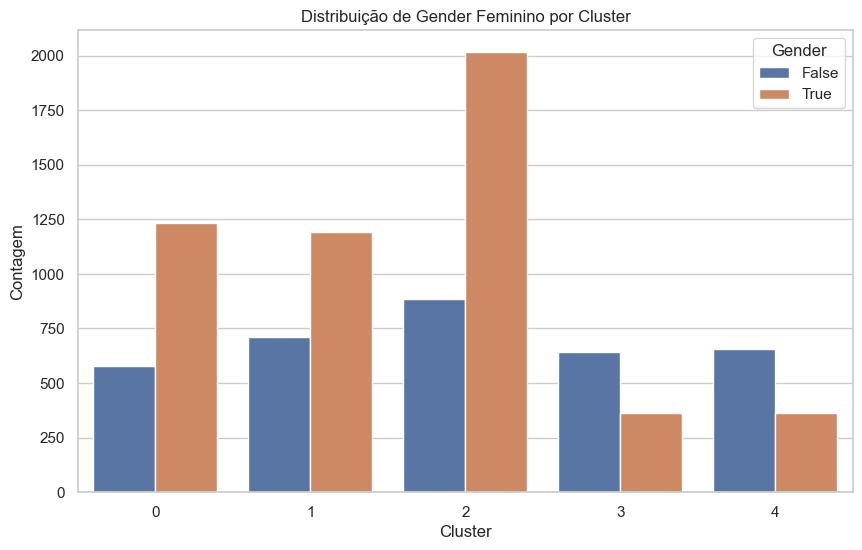

In [588]:
# Definindo o estilo do gráfico
sns.set(style="whitegrid")

# Criando um gráfico de barras para visualizar a distribuição de Gender por Cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='Gender_F', data=df)
plt.title('Distribuição de Gender Feminino por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.legend(title='Gender')
plt.show()

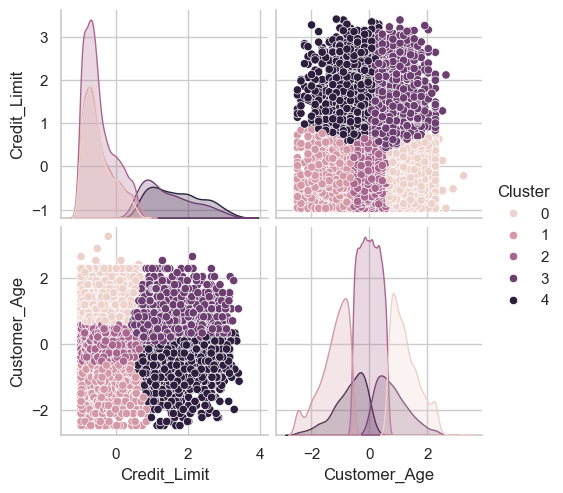

In [590]:
# Selecionando um subconjunto de variáveis numéricas para visualização
num_vars = ['Credit_Limit', 'Customer_Age']
data_for_pairplot = df[num_vars + ['Cluster']]

# Criando o pairplot colorido por 'Cluster'
sns.pairplot(data_for_pairplot, hue='Cluster')
plt.show()